# Test 1: Pure sine with noise

One possible approach to evaluating the frequency detection system's performance in the presence of noise, is to subject it to a set of simulated input signals, where the noise power increses with each iteration. This way, we can present a plot showing e.g. average frequency estimate, and estimate error expressed as a function of Signal-to-Noise Ratio (SNR).

Create a python program which generates a series of test signals with progressively increasing levels of white gaussian noise, and feeds it into the attached function `freq_detection`. Subsequently, your program should provide an analysis of the outuput from the function `freq_detection` for the various noise levels, which can take the form of a plot showing the frequency detection system's error as a function of SNR. This will be useful when evaluating the frequency detection system's performance in the presence of noise. Measuring the frequency estimate error in such a way will allow us to evaluate two things:
1. How precise the frequency estimate is
2. How robust the frequency detection system is to noise interference

PS. for a pure sine buried in additive noise, the Signal-to-Noise Ratio can be calculated with the following formula:<br>
$$SNR = \frac{P_{sin}}{P_{noise}} = \frac{A^2/2}{\sigma_{noise}^2}$$

In [90]:
from sympy.plotting.intervalmath import log10
from baseline_algorithm import freq_detection
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(fs, N, f, A):
    t_n = np.arange(N)/fs
    signal = A*np.cos(2*np.pi*f*t_n)
    
    return signal, t_n

# Signal Settings
fs = 10_000  # Samples/second
N = 2*fs  # Samples 
f = 1000  # Hertz
A = 1  # Volts

signal, t_n = generate_signal(fs, N, f, A)

SNR = np.logspace(-2,2, num=100)
noise_vars = ((A**2)/2)/(1/SNR)

# WRITE YOUR CODE IN THIS CELL:

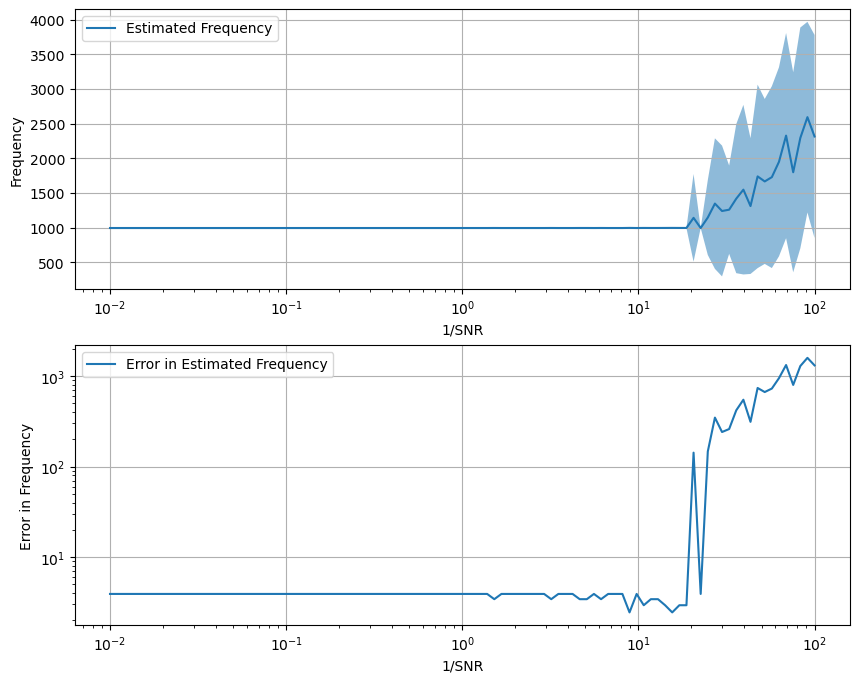

In [91]:
mean_f_est = np.array([])
std_f_est = np.array([])

####
# Why do we generate a new noise for every increase in power,
# instead of just adding together the same noise?
####

for noise_var in noise_vars:
    noise = np.random.normal(scale=np.sqrt(noise_var), size=(N)) 
    x_n = signal.copy() + noise.copy()
    t_est, f_est = freq_detection(x_n, fs)

    mean_f_est = np.append(mean_f_est, np.mean(f_est))
    std_f_est = np.append(std_f_est, np.std(f_est))
    
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,8))
ax1.set_xscale('log')
ax1.plot(SNR, mean_f_est, label="Estimated Frequency")
ax1.fill_between(SNR,(mean_f_est+std_f_est),(mean_f_est-std_f_est),alpha=0.5)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('1/SNR')
ax1.grid()
ax1.legend()

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(SNR, np.abs(f-mean_f_est), label="Error in Estimated Frequency")
ax2.set_ylabel('Error in Frequency')
ax2.set_xlabel('1/SNR')
ax2.grid()
ax2.legend()

plt.show()

[Here](Figures/sineTest_LF.png) is an image showing a *suggestion* for what or test output may look like for a tone of $885 Hz$. As we can see, the frequency detection system produces a stable output in the presence of noise, up to a point where the noise power is $\approx 20$ times greater than the sinusoid power. However, there is always some estimation error due to the limited resolution bandwidth offered by the FFT, resulting in the average error never going below $\approx 3.6 \text{ Hz}$.